In [18]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
diabetes =pd.read_csv('F:\PLACEMENT\machine lraning\diabetes_prediction\diabetes.csv')

In [20]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print("dimention of data set = {}".format(diabetes.shape))

dimention of data set = (768, 9)


In [23]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

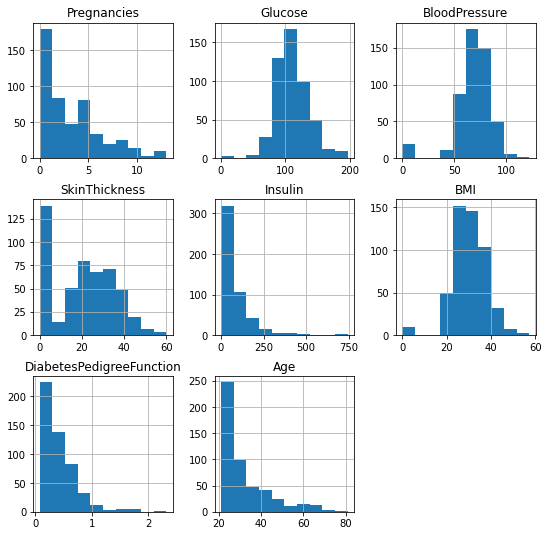

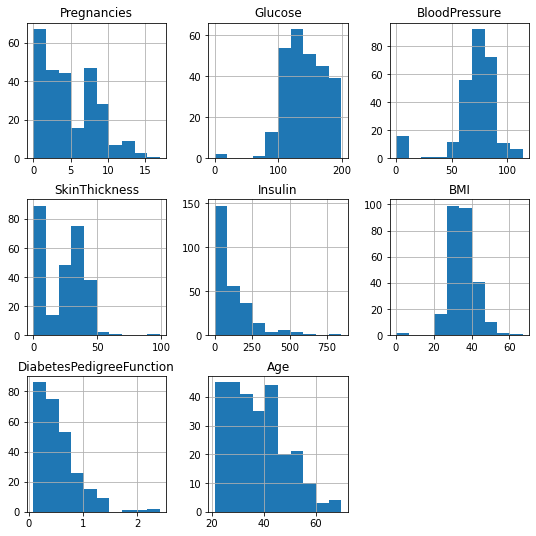

In [24]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

In [25]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Phase 2— Data Cleaning

### 1 Duplicate or irrelevant observations.
### 2 Bad labeling of data, same category occurring multiple times.
### 3 Missing or null data points.
### 4 Unexpected outliers

## Unexpected Outliers

### Blood pressure: By observing the data we can see that there are 0 values for blood pressure.

In [26]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


In [27]:
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome').count())

         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                 19       19             19             19       19   19   
1                 16       16             16             16       16   16   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                              19   19  
1                              16   16  


### Plasma glucose levels: Even after fasting glucose levels would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.


In [28]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])

Total :  5


In [29]:
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


## Skin Fold Thickness: 
### For normal people, skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0: 227.


In [30]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])

Total :  227


In [31]:
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Outcome
0    139
1     88
Name: Age, dtype: int64


## BMI: 
### Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.


In [32]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])

Total :  11


In [33]:
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Outcome
0    9
1    2
Name: Age, dtype: int64


## Insulin: 
### In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.


In [34]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])


Total :  374


In [35]:
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Outcome
0    236
1    138
Name: Age, dtype: int64


#### By the end of the data cleaning process, we have come to the conclusion that this given data set is incomplete. Since this is a demonstration for machine learning we will proceed with the given data with some minor adjustments.

### We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [36]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [37]:
print("shape of data set : {}".format(diabetes_mod.shape))

shape of data set : (724, 9)


# Phase 3— Feature Engineering


### Feature engineering enables us to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows avoiding overfitting the model despite providing many input features

In [38]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X=diabetes_mod[feature_names]
y=diabetes_mod.Outcome

# Phase 4— Model Selection

### we will be calculating the “Classification Accuracy (Testing Accuracy)” of a given set of classification models with their default parameters to determine which model performs better with the diabetes data set

## classifiers namely 
### K-Nearest Neighbors
### Support Vector Classifier, 
### Logistic Regression, 
### Gaussian Naive Bayes, 
### Random Forest, 
### Gradient Boost 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

## Evaluation Methods

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [57]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.714136
1  SVC  0.755651
2   LR  0.762462
3   DT  0.692199
4  GNB  0.754205
5   RF  0.768056
6   GB  0.758428


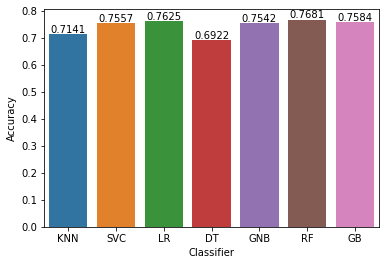

In [58]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## We can see the Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boosting have performed better than the rest. From the base level we can observe that the Logistic Regression performs better than the other algorithms.

### we were able to identify that Logistic Regression performed better than the other selected classification models. So now we will be discussing the next stages of the machine learning workflow, advanced feature engineering, and hyper parameter tuning.

# Phase 5 — Feature Engineering (Revisited)

## method are: 
### 1 Univariate feature selection
### 2 Recursive Feature selection
### 3 principal Component Analysis
### 4 Feature importance

### will be using Recursive Feature Elimination as the feature selection method

# logistic reg. feature selection

In [59]:
from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

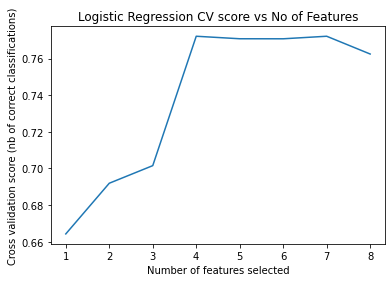

In [60]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

###  RFECV exposes support_ which is another attribute to find out the features which contribute the most to predicting

In [61]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


In [63]:
# Calculate accuracy scores 
X_new = diabetes_mod[new_features]
initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7624619482496195 
Accuracy after Feature Selection : 0.7721651445966515 


# Gradient Boosting — Feature Selection

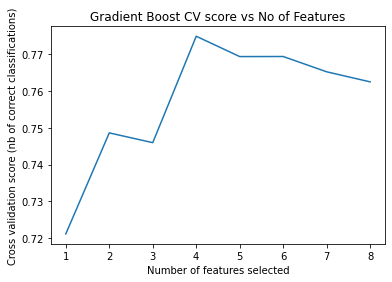

In [69]:
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(X, y)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [70]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [75]:
X_new_gb=diabetes_mod[new_features]
initial_score=cross_val_score(gb_model,X,y,cv=strat_k_fold,scoring='accuracy').mean()
print("initial accuracy : {}".format(initial_score))
fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

initial accuracy : 0.763907914764079
Accuracy after Feature Selection : 0.7708523592085237 


### However Logistic Regression is more accurate than Gradient Boosting. So we will use Logistic Regression for the parameter tuning phase

## Phase 6 — Model Parameter Tuning